Linear SVM Accuracy: 1.0

Classification Report (Linear SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

RBF SVM Accuracy: 1.0

Classification Report (RBF SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



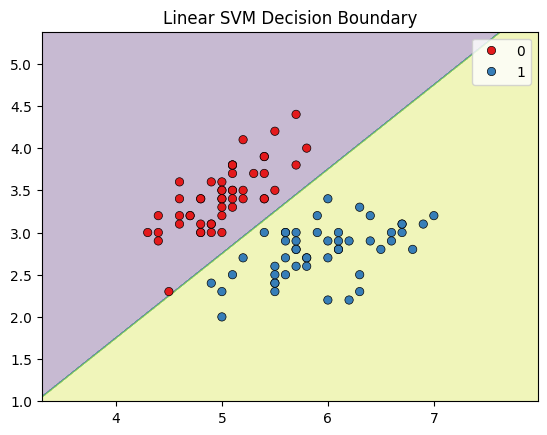

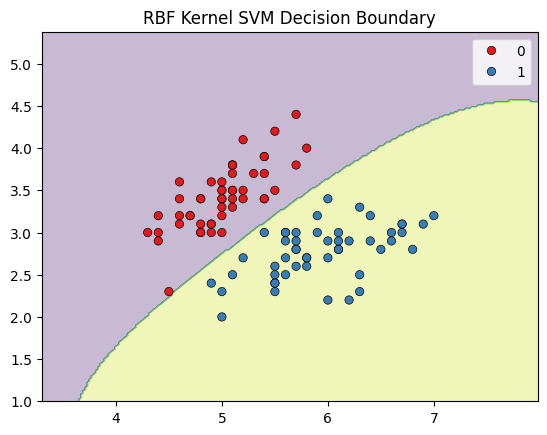

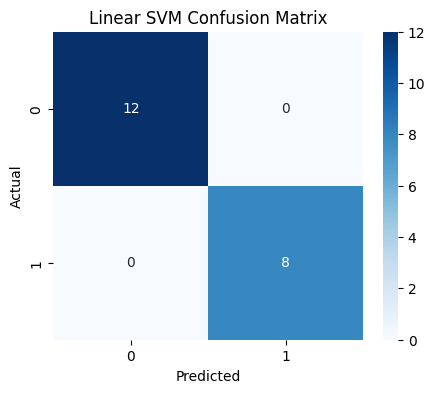

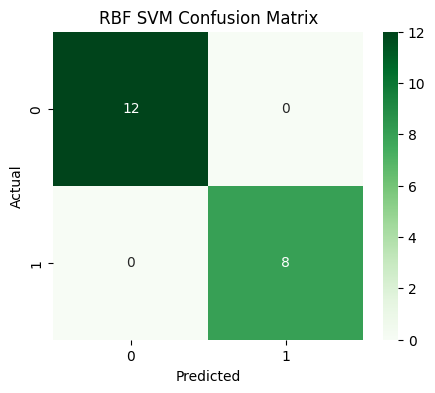

In [1]:
# ======================================
# Task 7: Support Vector Machines (SVM)
# ======================================

# Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# ------------------------------
# 1. LOAD DATA (Iris - two features for visualization)
# ------------------------------
iris = datasets.load_iris()
X = iris.data[:, :2]  # only first two features for easy plotting
y = iris.target

# Binary classification example (Setosa vs Versicolor)
X = X[y != 2]
y = y[y != 2]

# ------------------------------
# 2. TRAIN/TEST SPLIT
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 3. LINEAR SVM
# ------------------------------
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report (Linear SVM):\n", classification_report(y_test, y_pred_linear))

# ------------------------------
# 4. NON-LINEAR SVM (RBF Kernel)
# ------------------------------
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF SVM):\n", classification_report(y_test, y_pred_rbf))

# ------------------------------
# 5. DECISION BOUNDARY PLOTTING FUNCTION
# ------------------------------
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", edgecolor="k")
    plt.title(title)
    plt.show()

# ------------------------------
# 6. PLOT RESULTS
# ------------------------------
plot_decision_boundary(linear_svm, X, y, "Linear SVM Decision Boundary")
plot_decision_boundary(rbf_svm, X, y, "RBF Kernel SVM Decision Boundary")

# ------------------------------
# 7. CONFUSION MATRICES
# ------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap="Blues")
plt.title("Linear SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap="Greens")
plt.title("RBF SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
